In [8]:
import numpy as np
import matplotlib.pyplot as plt # use matplotlib for plotting with inline plots %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # for deprecated matplotlib functions
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
from yellowbrick.classifier import ClassificationReport, ROCAUC, ConfusionMatrix
from yellowbrick.features import RFECV
import warnings
warnings.filterwarnings('ignore') # for deprecated matplotlib functions

In [2]:
# load data
spamdata = np.genfromtxt("spambase.data",delimiter=",")
X, Y = spamdata[:,0:57], spamdata[:,-1]

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size = 0.25, shuffle = True, random_state=1)

In [3]:
print(spamdata.shape)
print("Number of features:\t", X.shape[1])
print("Number of training data points:\t", Xtr.shape[0])
print("Number of test data points:\t", Xte.shape[0])

(4601, 58)
Number of features:	 57
Number of training data points:	 3450
Number of test data points:	 1151


## Feature Selection - RFE

In [ ]:
def get_features (support):
    count = 0
    arr = []
    for i in support:
        if i:
            arr.append(count)
        count += 1
    return arr

In [ ]:
cnt = 0
train_scores = list()
test_scores = list()
for i in range(1,X.shape[1]+1):
    svc = LinearSVC()
    selector = RFE(svc, i).fit(X, Y)
    features = get_features(selector.support_)
    Xrfe = X[:,features]
    Xrfe_tr, Xrfe_te, Yrfe_tr, Yrfe_te = train_test_split(Xrfe, Y, test_size=0.3, shuffle=True, random_state=1)
    clf = svc.fit(Xrfe_tr,Yrfe_tr)
    train_score = clf.score(Xrfe_tr,Yrfe_tr)
    test_score = clf.score(Xrfe_te,Yrfe_te)
    '''
    print("features:\t",i)
    print("training score:\t", train_score)
    print("test score:\t", test_score)
    '''
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
plt.rcParams["figure.figsize"] = (15.0,8.0)
plt.semilogy(range(1,X.shape[1]+1), train_scores, label="training score")
plt.semilogy(range(1,X.shape[1]+1), test_scores, label="test score")
plt.xlabel('Features')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
res = sorted(enumerate(test_scores), key=lambda d:d[1])[-1]
print("At feature =", res[0]," test score at highest at:", res[1])

## RFECV

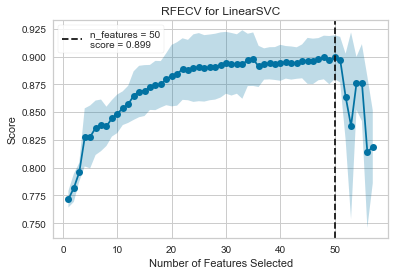

In [10]:
model = LinearSVC()
viz = RFECV(model)
viz.fit(X, Y)
viz.poof()

## Training Data

In [ ]:
clf = SVC().fit(Xtr, Ytr)
print("Training score:\t", clf.score(Xtr,Ytr))
print("Test score:\t", clf.score(Xte,Yte))

In [ ]:
Yhat = clf.predict(Xte)
err = 0
for i in range(len(Xte)):
    if Yhat[i] != Yte[i]:
        err += 1
print("Error rate: ", err/len(Xte))

## Visualization

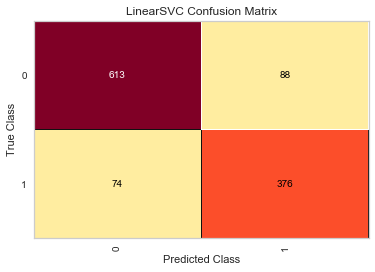

In [4]:
model = LinearSVC()
cm = ConfusionMatrix(model, classes=[0, 1])
cm.fit(Xtr, Ytr)
cm.score(Xte, Yte)
cm.poof()

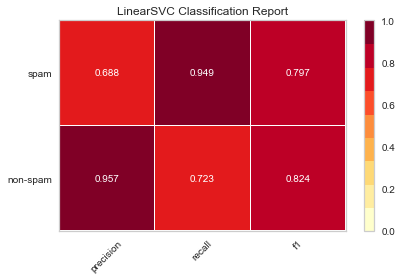

In [5]:
visualizer = ClassificationReport(model, classes=['non-spam', 'spam'])

visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

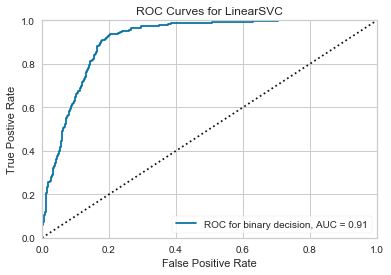

In [6]:
visualizer = ROCAUC(model, classes=['non-spam', 'spam'], micro=False, macro=False, per_class=False)
visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()